# アヤメの分析

### フィッシャーのアヤメ
#### 「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。
#### これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。
* Iris setosa - Wikipedia
* Iris virgicolor - Wikipedia
* Iris virginica - Wikipedia

#### setosa、virgiclor、virginicaはここで *目的変数* や *ラベル* と呼ばれるものに当たります。
#### 1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を *特徴量* と呼びます。

### データセットの準備
#### scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得
#### 以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。
#### sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
#### データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

iris.data・・・行列データ（分類するための情報）=説明変数

iris.target・・・分類対象=目的変数

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# irisデータセットをirisに格納
iris = load_iris()

# irisデータセットをDataFrameに変換
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# df.head()
X

In [ ]:
# iris = datasets.load_iris()
# iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# iris_df['Species'] = iris.target_names[iris.target]
# iris_df

In [ ]:
# iris.target・・・分類対象=目的変数
# iris_target = pd.DataFrame(iris.target, columns =['Species'])
y = pd.DataFrame(iris.target, columns =['Species'])
# iris_target
y

## 【問題2】データの結合
#### 問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [ ]:
df = pd.concat([X, y], axis=1)
df

## 【問題3】データの確認
#### 今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。
①先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）<br>
②ラベルごとのサンプル数の合計を出力する。<br>
③特徴量に欠損値があるかを確認する。<br>
④特徴量の平均値と標準偏差、四分位数を一度に表示させる。

#### DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [ ]:
print("")
print("①各特徴量がどういったものかを見る。（数値データか文字データかなど）")
print("")
df.info()
# DataFrameの行数、列数、各列の列名、各列に格納されるデータの型、メモリ使用量

In [ ]:
# df['sepal length (cm)'].value_counts()
print("")
print("②ラベルごとのサンプル数の合計を出力する。")
print("")
df['Species'].value_counts()

In [ ]:
print("")
print("③特徴量に欠損値があるかを確認する。")
print("")
# 各要素に対して判定を行い、欠損値NaNであればTrue、欠損値でなければFalseとする。
df.isnull().head(4)

上からデータ数（count）、平均値（mean）、標準偏差（std）、最小値（min）、第一四分位数（25%）、中央値（50%）、第三四分位数（75%）、最大値（max）です。Ageのcountが行数891に一致しない理由は、欠損値が含まれるためです。

In [ ]:
print("")
print("④特徴量の平均値と標準偏差、四分位数を一度に表示させる。")
print("")
# df.describe().head(4)
df.describe()

In [ ]:
df.isnull().any()

In [ ]:
df['sepal length (cm)'].sum()

## 【問題4】irisデータセット自体の調査
#### ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

Irisデータセットはアヤメの種類と特徴量に関するデータセット。
3種類のアヤメの花弁と萼(がく)に関する特徴量について多数のデータ
アヤメの3つの種類の種類名。
setosaは「ヒオウギアヤメ」といって少し大人締めの色形だが、versicolorとvirginicaは素人にはその違いがよく分からない。

* 'data'～特徴量データセット
* 'target'～アヤメの種類に対応したコード
* 'target_names'～アヤメの種類名
* 'feature_names'～特徴名

### 特徴量についての探索
#### 各特徴量や特徴量同士の関係を見ていきます。

## 【問題5】必要なデータを抽出
#### DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。
* ①sepal_widthの列を３つの異なる方法で抽出する<br>
* ②50番目から99番目までのデータを抽出する<br>
* ③petal_lengthの列の50番目から99番目までのデータを抽出する<br>
* ④petal_widthの値が0.2のデータを抽出する<br>

#### .locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [ ]:
# df['sepal width (cm)']
# df[df.columns[1]]
# df.iloc[: , 1]
print("")
print("①sepal_widthの列を３つの異なる方法で抽出する")
print("")
df.loc[: , 'sepal width (cm)']
df.iloc[: , 1]
df[df.columns[1]]

In [ ]:
print("")
print("②50番目から99番目までのデータを抽出する")
print("")
# df.iloc[50 : 100, :]
display(df[50:100])

In [ ]:
print("")
print("③petal_lengthの列の50番目から99番目までのデータを抽出する")
print("")
df.loc[50 : 100, ['petal length (cm)']]

* petal_widthの値が0.2のデータを抽出する

In [ ]:
print("")
print("④petal_widthの値が0.2のデータを抽出する")
print("")


# df.df["petal width (cm)"] == 0.2
# display(df.query("petal_width == 0.2"))

### .locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

#### 位置の指定方法

* at, loc : 行名（行ラベル）、列名（列ラベル)
* iat, iloc : 行番号、列番号
* ix : 行ラベル、列ラベル または 行の番号(0 ~ )、列の番号(0 ~ )

#### 使い分け
ilocを使うとき
* データ全体が見渡せる程度のデータ量のとき
* スライスで特定の範囲を抽出したい時
locを使うとき
* 名前で抽出したいとき
* ソースコードの可読性を求める時

## 【問題6】図の作成
#### データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


* ①ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）<br>
* ②特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する<br>
* ③特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する<br>

#### 箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

* ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("")
print("①ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）")
print("")
iris = sns.load_dataset('iris')
iris['species'].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')

# iris = datasets.load_iris().target
# crosstab = pd.crosstab(iris, columns="Target")
# dict = crosstab['Target'].to_dict()
# values = list(dict.values())
# labels = list(dict.keys())
# plt.pie(values, labels = labels)
# plt.show()

In [ ]:
print("")
print("②特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する")
print("")
#sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

In [ ]:
print("")
print("③特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する")
print("")
sns.set(style="darkgrid")
#sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.show()

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

# 箱ひげ図（box plot; box-and-whisker plot）
データの要約統計量を示しつつ、同時に分布を表せる
箱ひげ図は、五数要約と呼ばれる統計量を表すグラフです。

五数要約とは、

Q0/4：最小値
Q1/4：第1四分位点
Q2/4：中央値
Q3/4：第3四分位点
Q4/4：最大値
# バイオリンプロット
分布の形状が箱ひげ図よりも直観的にわかるようになる
バイオリンプロットのメリットとして、確率密度がわかるという点が挙げられます。確率密度はヒストグラムをイメージするといいと思いますが、ざっくりデータの分布にことだと思ってください。
この特徴から、バイオリンプロットは箱ひげ図とヒストグラムの特徴を組みあわせたようなグラフと言えます。
確率密度がわかることで、データの分布に複数の山があるときには特に有用です。箱ひげ図では、データの分布の山が複数あってもわかりません。
バイオリン図の欠点
バイオリン図の欠点について考えてみます。

データ分布はカーネル密度推定プロットによって滑らかに描画されるため、実際にはデータが存在しない範囲にもあたかもデータが存在しているかのように見えることがある。
ひとつのバイオリン図内にある各カーネル密度推定プロットの面積は同一ではない。値が取りうる範囲が大きかったりデータが一様に分布していると、描画されるカーネル密度推定プロットの面積が大きくなるため錯覚が起こる可能性がある。
知名度が低い（Wikipedia談）。しかし割と直感的に分かりやすい図法ではあると思われるので、知名度が低くても人から理解されにくいということはなさそう？


# 両方

数値データの分布を可視化・比較したい場合は、バイオリン図を使ってみましょう。単峰性のデータかつ四分位数や外れ値が重要な場合は箱ひげ図でもいいかもしれませんが、単峰性データの歪み具合を見たい程度であればバイオリン図にしてしまってもいいのではないかと思います。

> データ数（count）、平均値（mean）、標準偏差（std）、最小値（min）、第一四分位数（25%）、中央値（50%）、第三四分位数（75%）、最大値（max）です。Ageのcountが行数891に一致しない理由は、欠損値が含まれるためです。

## 【問題7】特徴量間の関係の確認
#### 特徴量間の関係を見ていきます。次の4つを行ってください。
* ４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。以下の図はそのうち一つの例です。
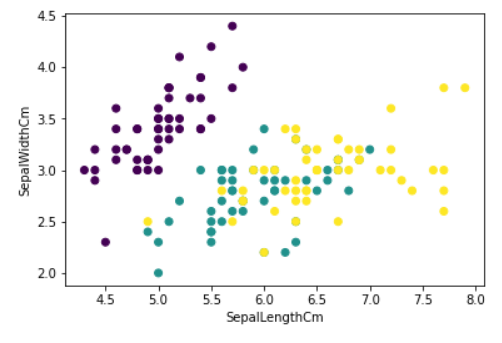
#### 特徴量すべてを組み合わせを一度に表示させた、散布図行列を作る。
* seaborn.pairplot - seaborn 0.11.1 documentation<br>
４つの特徴量に関する相関係数行列を作る
#### 相関係数行列はDataFrameのcorr()メソッドを使うことで求められます
* pandas.DataFrame.corr — pandas 0.24.2 documentation
#### 相関係数行列のヒートマップを作る(１つ)
* seaborn.heatmap - seaborn 0.11.1 documentation

In [ ]:
print("")
print("①４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。以下の図はそのうち一つの例です。")
print("")

x_0 = df[df.Species==0].iloc[:, 0]
x_1 = df[df.Species==1].iloc[:, 0]
x_2 = df[df.Species==2].iloc[:, 0]

y_0 = df[df.Species==0].iloc[:, 1]
y_1 = df[df.Species==1].iloc[:, 1]
y_2 = df[df.Species==2].iloc[:, 1]

plt.title("This is a ilrs")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_2, c='green')

In [ ]:
print("")
print("②すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。")
print("")

# カテゴリデータに従って色分け: 引数 hue
sns.pairplot(iris, hue='species') 

In [ ]:
print("")
print("③４つの特徴量に関する相関係数行列を作る")
print("")

#df.corr(method='pearson')
# df.corr(df.iloc[ : , 0: 4])
df.iloc[ : , 0: 4].corr()

In [ ]:
print("")
print("④相関係数行列のヒートマップを作る(１つ)")
print("")
print("相関係数は、x と y の間の直線的な関係性の強さを表す指標")
print("")

# sns.heatmap(df, annot=True)
plt.figure(figsize=(8, 6))
# plt.figure(figsize=(10, 10))

# annot=Trueを指定すると、セル内に値が表示
sns.heatmap(df.iloc[ : , 0: 4].corr(), annot=True)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
#### データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。
#### 例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

---------------------------------------------------------------------------------------------<br>
視覚的には散布図を一覧に並べて比べる方法がわかりやすい。<br>

すべての特徴量の組み合わせを一度に表示させた、散布図行列から<br>
sepal_length, sepal_width, petal_length, petal_widthの相関においてvirgiclor、virginicaが近い分布を示し、setosaと区別しやすい。<br>

相関行列、ヒートマップからpetal_lengthとpetal_widthの相関が強いことがわかる。<br>

sepal_lengthとpetal_length及びpetal_widthが負の相関関係にあるためがく片の幅と花弁には成長に相関があるかもしれない。<br>

---------------------------------------------------------------------------------------------<br>

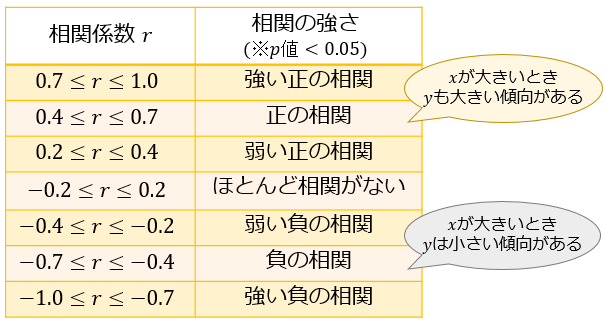

In [ ]:
print(1)

